In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv('../data/weather.csv')

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

# Sort data by time (important for time series)
df = df.sort_values('time')

# Quick overview
print(df.shape)
print(df.columns)
df.head()


(147480, 24)
Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'snowfall_sum', 'precipitation_hours', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'latitude', 'longitude', 'elevation',
       'country', 'city'],
      dtype='object')


,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,2010-01-01,2,30.0,22.7,26.1,34.4,25.2,29.2,6:22:00 AM,6:05:00 PM,...,0,11.7,27.4,20,4.58,7.000000,79.899994,16,Sri Lanka,Colombo
108152,2010-01-01,3,26.7,20.4,23.5,28.4,22.8,25.6,6:20:00 AM,6:01:00 PM,...,0,17.7,42.8,57,3.54,7.599998,80.600006,376,Sri Lanka,Matale
122900,2010-01-01,2,28.5,21.7,24.8,30.4,24.3,27.1,6:21:00 AM,6:02:00 PM,...,0,19.2,43.6,44,4.12,7.500000,80.399994,124,Sri Lanka,Kurunegala
103236,2010-01-01,2,29.7,23.0,26.3,34.3,25.7,30.2,6:20:00 AM,6:06:00 PM,...,0,11.7,27.4,20,4.35,6.500000,80.000000,10,Sri Lanka,Bentota
4916,2010-01-01,2,30.1,22.6,26.1,34.4,24.9,29.1,6:22:00 AM,6:05:00 PM,...,0,11.7,27.4,20,4.61,6.900002,79.899994,10,Sri Lanka,Mount Lavinia


In [4]:
# Extract date features
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['dayofweek'] = df['time'].dt.dayofweek

# Drop columns that are not useful or non-numeric
df = df.drop(columns=['time', 'sunrise', 'sunset', 'country', 'city'])

# Drop rows with NaNs if any
df = df.dropna()



In [5]:
target = 'temperature_2m_max'
X = df.drop(columns=[target])
y = df[target]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2761
[LightGBM] [Info] Number of data points in the train set: 117984, number of used features: 21
[LightGBM] [Info] Start training from score 29.273779


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [10]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print("MAE:", mae)
print("RMSE:", rmse)



MAE: 0.2540051442055612
RMSE: 0.32846394074641244


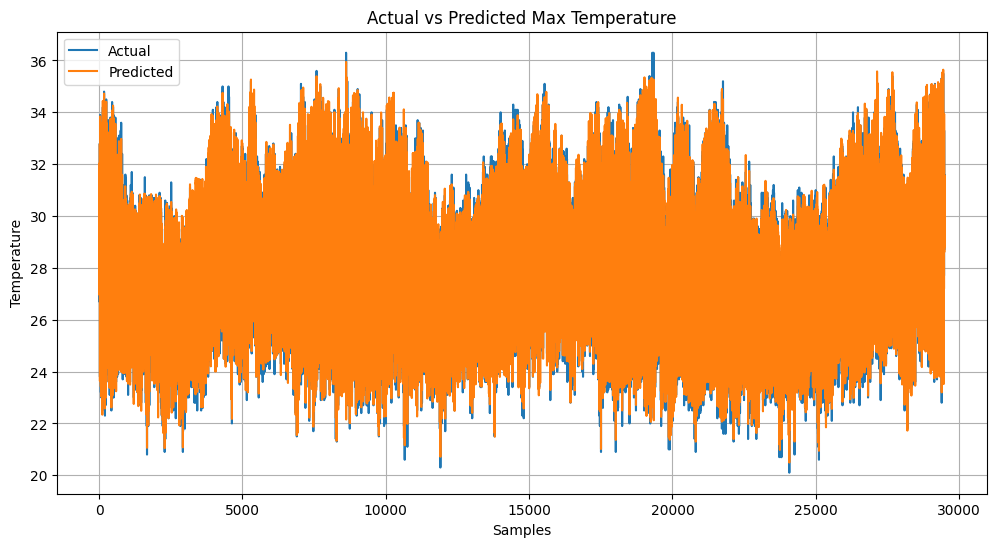

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Max Temperature')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()
